# **NYC Restaurant Inspections**

Joe Lardie

Sep 2023

# **Imports**

In [1]:
#Numpy
import numpy as np

#Pandas
import pandas as pd

#Seaborn
import seaborn as sns

#matplotlib
import matplotlib.pyplot as plt
import plotly


#Sklearn preprocessing
from sklearn import preprocessing,set_config
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder,StandardScaler,LabelEncoder

#Sklearn Models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn import preprocessing, set_config
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer,make_column_selector,make_column_transformer
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")
set_config(display = 'diagram')

# **Data Dictionary**
**CAMIS**	This is an unique identifier for the entity (restaurant); 10-digit integer, static per restaurant permit

**DBA**	This field represents the name (doing business as) of the entity (restaurant); Public business name, may change at discretion of restaurant owner

**BORO**	Borough in which the entity (restaurant) is located.;• 1 = MANHATTAN • 2 = BRONX • 3 = BROOKLYN • 4 = QUEENS • 5 = STATEN ISLAND • Missing; NOTE: There may be discrepancies between zip code and listed boro due to differences in an establishment's mailing address and physical location

**BUILDING**  Building number for establishment (restaurant) location

**STREET**	Street name for establishment (restaurant) location

**ZIPCODE**	Zip code of establishment (restaurant) location

**PHONE**	Phone Number; Phone number provided by restaurant owner/manager

**CUISINE DESCRIPTION**	This field describes the entity (restaurant) cuisine. ; Optional field provided by provided by restaurant owner/manager

**INSPECTION DATE**	This field represents the date of inspection; NOTE: Inspection dates of 1/1/1900 mean an establishment has not yet had an inspection

**ACTION**	This field represents the actions that is associated with each restaurant inspection. ; • Violations were cited in the following area(s). • No violations were recorded at the time of this inspection. • Establishment re-opened by DOHMH • Establishment re-closed by DOHMH • Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed. • "Missing" = not yet inspected;

**VIOLATION CODE**	Violation code associated with an establishment (restaurant) inspection

**VIOLATION DESCRIPTION**Violation description associated with an establishment (restaurant) inspection

**CRITICAL FLAG**	Indicator of critical violation; "• Critical • Not Critical • Not Applicable"; Critical violations are those most likely to contribute to food-borne illness

**SCORE**Total score for a particular inspection; Scores are updated based on adjudication results

**GRADE**	Grade associated with the inspection; • N = Not Yet Graded• A = Grade A• B = Grade B• C = Grade C• Z = Grade Pending• P= Grade Pending issued on re-opening following an initial inspection that resulted in a closure

**GRADE DATE**	The date when the current grade was issued to the entity (restaurant)

**RECORD DATE**	The date when the extract was run to produce this data set

**INSPECTION TYPE** A combination of the inspection program and the type of inspection performed; See Data Dictionary for full list of expected values


# **Potential Project Objectives**
Predictive Modeling:

Can you build a predictive model to forecast which restaurants are more likely to fail inspections based on historical data? What factors contribute most to inspection failure?

Temporal Trends:

Are there any temporal trends in inspection results? Do certain months or seasons have a higher rate of violations or failures?

Geospatial Analysis:

Can you visualize and analyze the distribution of restaurant inspections across different neighborhoods or boroughs in NYC?
Are there any geographical patterns in inspection outcomes or violations?

Violation Analysis:

What are the most common types of violations reported during inspections? Can you identify any patterns or clusters of violations?

Are there any associations between specific types of violations and restaurant characteristics (e.g., cuisine type, restaurant size)?

Impact of Demographics:

Is there a correlation between neighborhood demographics (e.g., income levels, population density) and restaurant inspection results?

Do restaurants in certain neighborhoods tend to perform better or worse in inspections?

Influence of Restaurant Type:

Does the type of cuisine or restaurant (e.g., fast food, fine dining, food truck) impact inspection outcomes?
Are there significant differences in inspection results based on restaurant size or seating capacity?

Seasonal Variations:

Are there seasonal variations in the number of inspections, violations, or inspection outcomes?
Do certain holidays or events impact inspection results?

Compliance Trends:

Can you identify any trends or improvements in restaurant compliance with food safety regulations over time?
Are there any specific regulations or rules that are frequently violated?

Customer Reviews vs. Inspection Results:

Is there a correlation between online customer reviews/ratings and inspection outcomes for restaurants?
Do restaurants with higher ratings tend to have fewer violations?

Effectiveness of Public Health Campaigns:

Have public health campaigns or initiatives had any measurable impact on restaurant inspection results?
Can you assess the effectiveness of specific interventions aimed at improving food safety?

Machine Learning for Anomaly Detection:

Can you develop a machine learning model to automatically flag potential anomalies or unusual patterns in inspection results that may warrant further investigation?

Time Series Analysis:

Can you use time series analysis to forecast future inspection results or identify recurring patterns in violations over time?

Predicting Inspection Scores:

Can you build a model to predict the inspection scores (e.g., letter grades) that restaurants are likely to receive?

Comparative Analysis:

How do NYC's restaurant inspection results compare to those in other cities or regions? Are there any notable differences or similarities?

Restaurant Chain Analysis:

Do restaurant chains tend to perform better or worse in inspections compared to independent establishments? Are there differences in compliance between locations of the same chain?

# **Loading Data**

In [12]:
# Loading NYC Restaraunt Data
rdf = pd.read_csv('https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD')

In [3]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204872 entries, 0 to 204871
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  204872 non-null  int64  
 1   DBA                    204387 non-null  object 
 2   BORO                   204872 non-null  object 
 3   BUILDING               204563 non-null  object 
 4   STREET                 204868 non-null  object 
 5   ZIPCODE                202157 non-null  float64
 6   PHONE                  204865 non-null  object 
 7   CUISINE DESCRIPTION    202621 non-null  object 
 8   INSPECTION DATE        204872 non-null  object 
 9   ACTION                 202621 non-null  object 
 10  VIOLATION CODE         201490 non-null  object 
 11  VIOLATION DESCRIPTION  201490 non-null  object 
 12  CRITICAL FLAG          204872 non-null  object 
 13  SCORE                  195430 non-null  float64
 14  GRADE                  101512 non-nu

# **Data Cleaning**

In [4]:
# Dropping irrelevant of imcomplete columns
rdf.drop(['Location Point1', 'CAMIS', 'PHONE', 'BBL', 'BIN', 'NTA', 'Census Tract', 'Community Board', 'RECORD DATE'], axis=1, inplace=True)

In [5]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204872 entries, 0 to 204871
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DBA                    204387 non-null  object 
 1   BORO                   204872 non-null  object 
 2   BUILDING               204563 non-null  object 
 3   STREET                 204868 non-null  object 
 4   ZIPCODE                202157 non-null  float64
 5   CUISINE DESCRIPTION    202621 non-null  object 
 6   INSPECTION DATE        204872 non-null  object 
 7   ACTION                 202621 non-null  object 
 8   VIOLATION CODE         201490 non-null  object 
 9   VIOLATION DESCRIPTION  201490 non-null  object 
 10  CRITICAL FLAG          204872 non-null  object 
 11  SCORE                  195430 non-null  float64
 12  GRADE                  101512 non-null  object 
 13  GRADE DATE             91760 non-null   object 
 14  INSPECTION TYPE        202621 non-nu

In [13]:
rdf['VIOLATION DESCRIPTION'].value_counts()

Non-food contact surface or equipment made of unacceptable material, not kept clean, or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.                                                            14839
Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.                                                                                                                                     13976
Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.    13439
Establishment is not free of harborage or conditions conducive to rodents, insects or other pests.                                                           

In [6]:
rdf['VIOLATION CODE'].value_counts()

10F      28278
08A      22281
06D      13976
04L      13865
02G      12214
         ...  
20C          1
17A1         1
19-01        1
22B          1
19-03        1
Name: VIOLATION CODE, Length: 144, dtype: int64

In [14]:
rdf['CRITICAL FLAG'].value_counts()

Critical          111799
Not Critical       88436
Not Applicable      4637
Name: CRITICAL FLAG, dtype: int64

# **Visualizations**

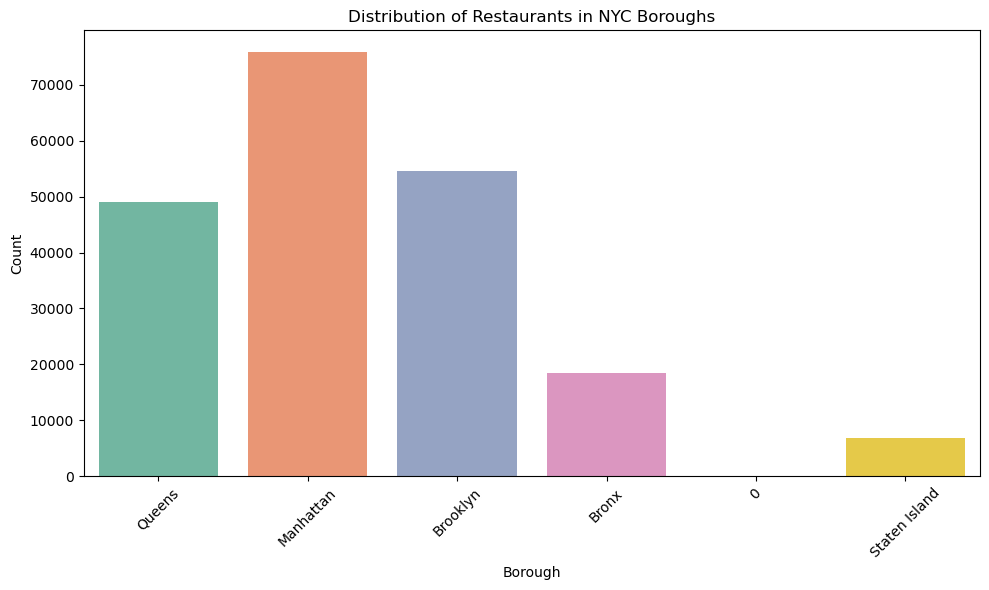

In [7]:
# Visualizing Distribution of Restaurants in NYC Boroughs
plt.figure(figsize=(10, 6))
sns.countplot(data=rdf, x='BORO', palette='Set2') 
plt.title('Distribution of Restaurants in NYC Boroughs')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

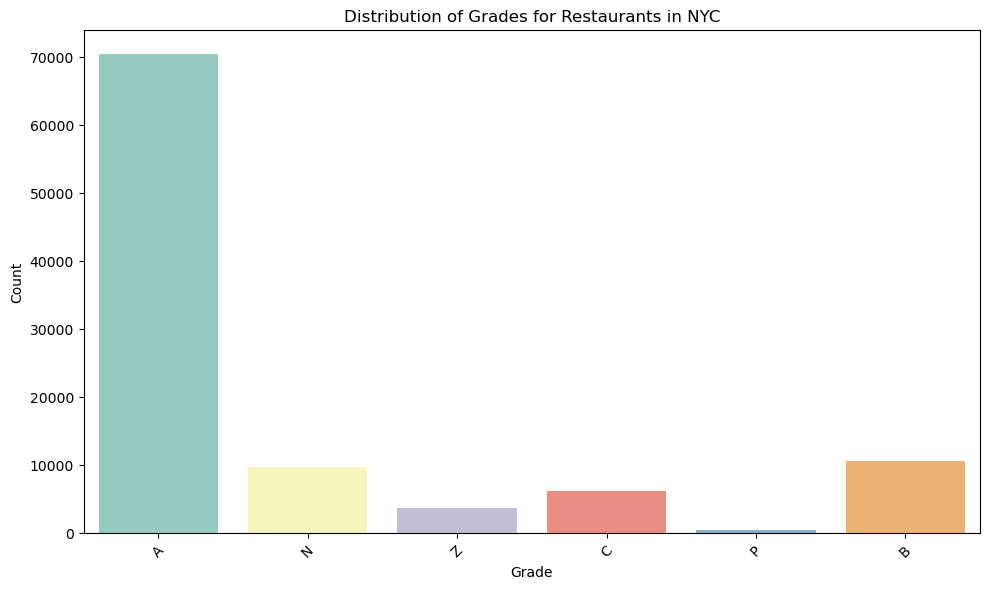

In [15]:
# Visualizing Distribution of Grades for Restaurants in NYC
plt.figure(figsize=(10, 6))
sns.countplot(data=rdf, x='GRADE', palette='Set3')  
plt.title('Distribution of Grades for Restaurants in NYC')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [9]:
# Filteriung out the irrelevant Cuisine Types for Visalization
min_cuisine_count = 1000
cuisine_counts = rdf['CUISINE DESCRIPTION'].value_counts()
filtered_cuisines = cuisine_counts[cuisine_counts >= min_cuisine_count].index
fdf = rdf[rdf['CUISINE DESCRIPTION'].isin(filtered_cuisines)]

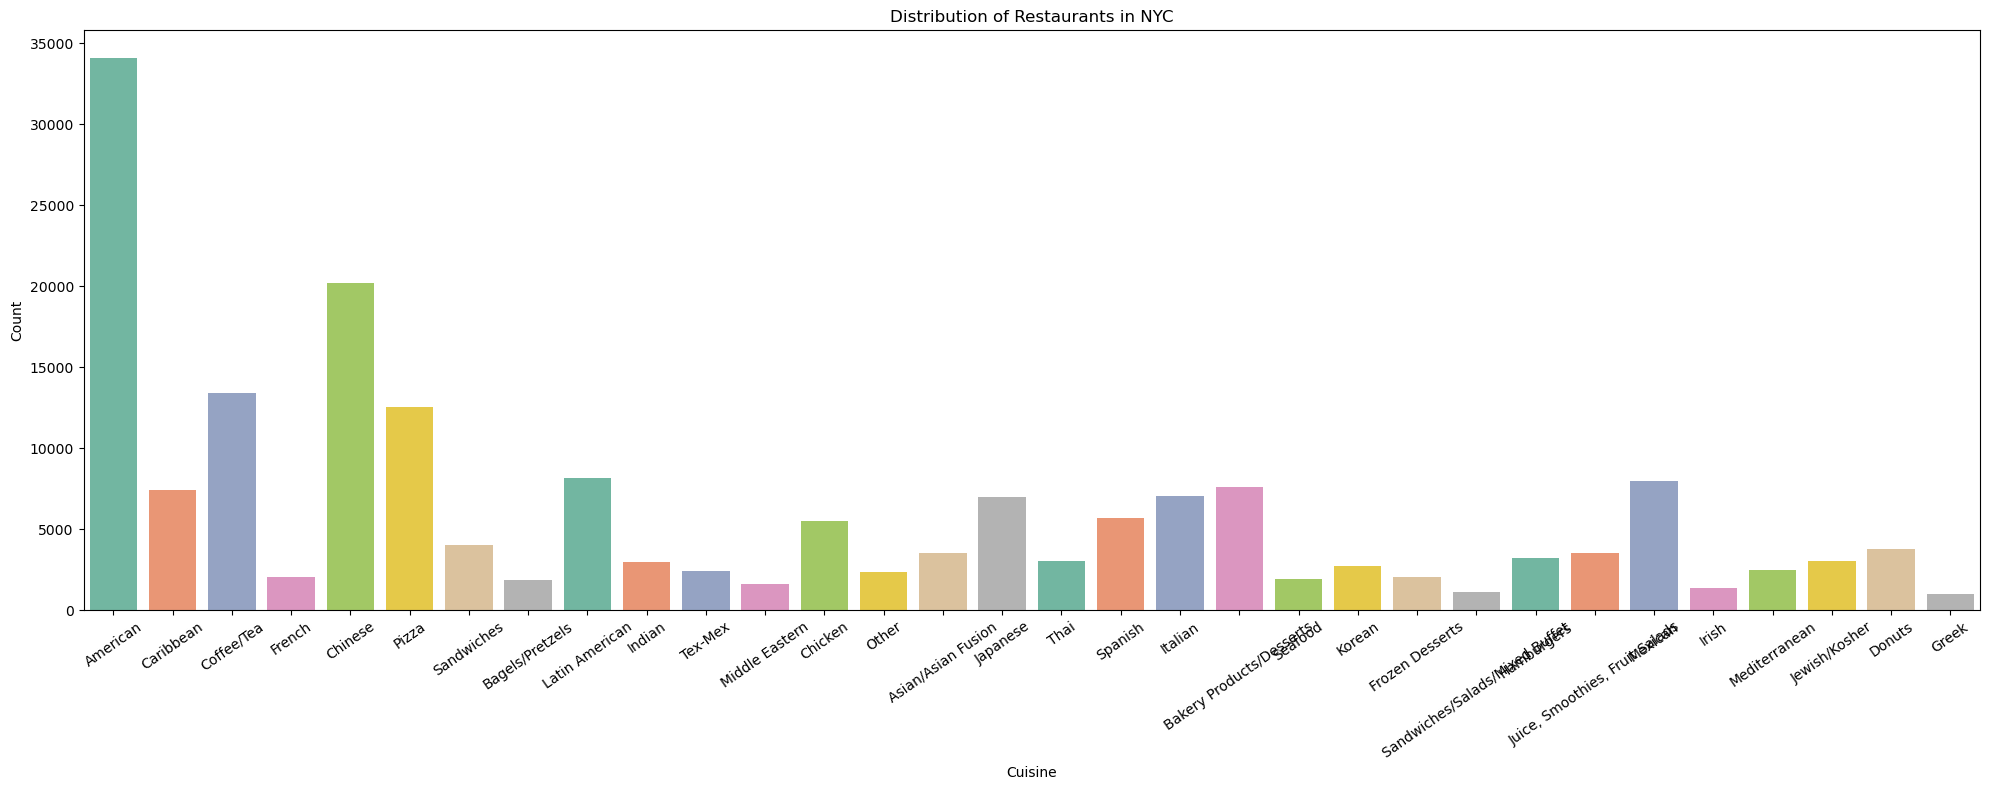

In [10]:
# Visualization of most popular cuisines
plt.figure(figsize=(20,8))
sns.countplot(data=fdf, x='CUISINE DESCRIPTION', palette='Set2') 
plt.title('Distribution of Restaurants in NYC')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=35) 

plt.tight_layout()
plt.show()

In [11]:
#rdf.to_csv('rdf', index=False)